In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

### **Reading Heart_Disease_Prediction CSV file**

In [3]:
df = pd.read_csv("heart_disease_data.csv")

### **Split Features and Target**

In [5]:
X = df.drop("target", axis=1)
y = df["target"]

### Identify Feature **Types**

In [6]:
categorical = ["cp", "restecg", "slope", "thal"]
numerical = list(set(X.columns) - set(categorical))

### **Preprocessing data**

In [7]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(drop="first"), categorical)
])

### Apply **transformations**

In [8]:
X_processed = preprocessor.fit_transform(X)

### Splitting data into *test* and *train* **dataset**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, stratify=y, random_state=42)

### Deep Learning : Using Keras **Model**

In [11]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Model Compilation**

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### **Early Stopping**

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### **Train the model**

In [14]:
model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5770 - loss: 0.6693 - val_accuracy: 0.7959 - val_loss: 0.5364
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6703 - loss: 0.5958 - val_accuracy: 0.8163 - val_loss: 0.4807
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7296 - loss: 0.6005 - val_accuracy: 0.8367 - val_loss: 0.4462
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8131 - loss: 0.4930 - val_accuracy: 0.8163 - val_loss: 0.4123
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7951 - loss: 0.5176 - val_accuracy: 0.8163 - val_loss: 0.3904
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7845 - loss: 0.5019 - val_accuracy: 0.8367 - val_loss: 0.3671
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8099 - loss: 0.4877 - val_accuracy: 0.8571 - val_loss: 0.3562
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8066 - loss: 0.4773 - val_accuracy: 0.857

# **Predictions**

In [16]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


# **Evaluation**

In [17]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix:
 [[21  7]
 [ 4 29]]
ROC AUC Score: 0.9101731601731602


### Confusion Matrix Interpretation

1. 24 people correctly classified as No Disease
2. 6 people wrongly classified as Disease (they were healthy)
3. 3 people wrongly classified as Healthy (they had disease)
4. 28 people correctly classified as Disease



# **Data Visualization of the dataset**

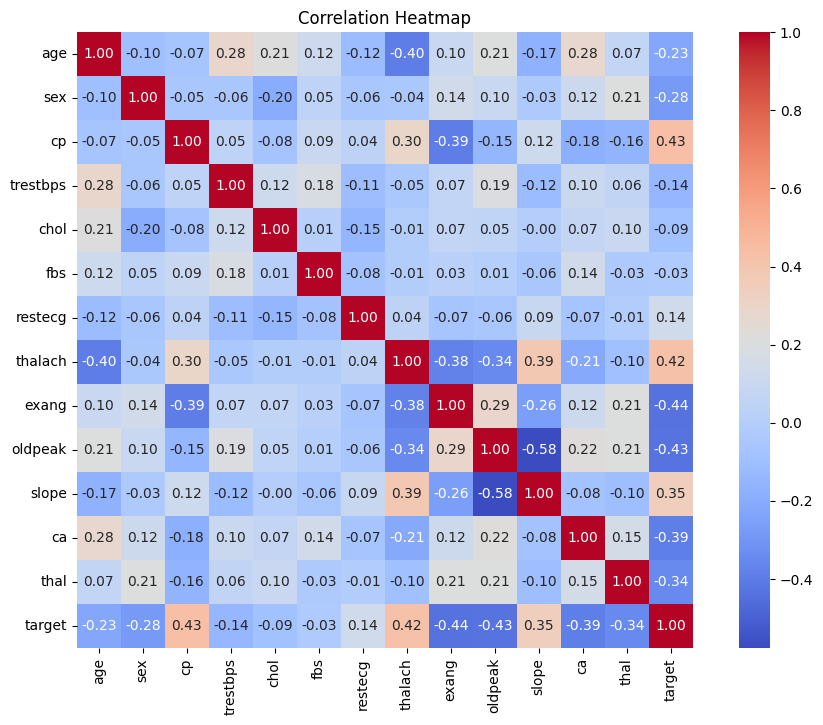

/tmp/ipython-input-18-2217244264.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


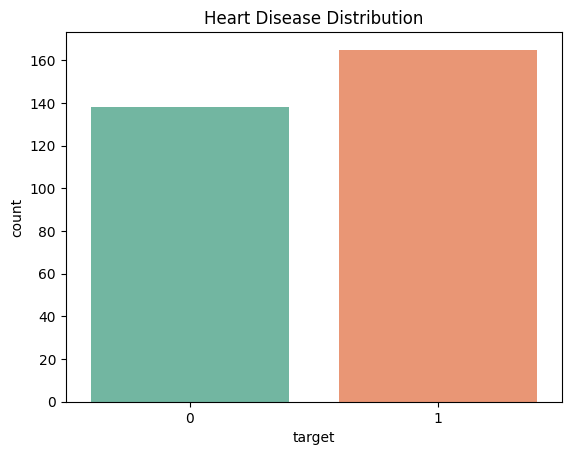

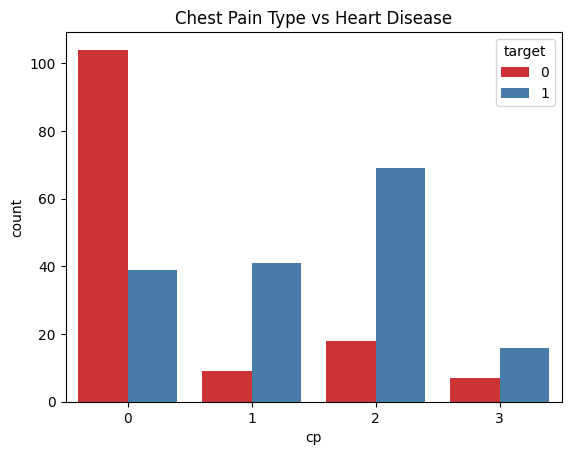

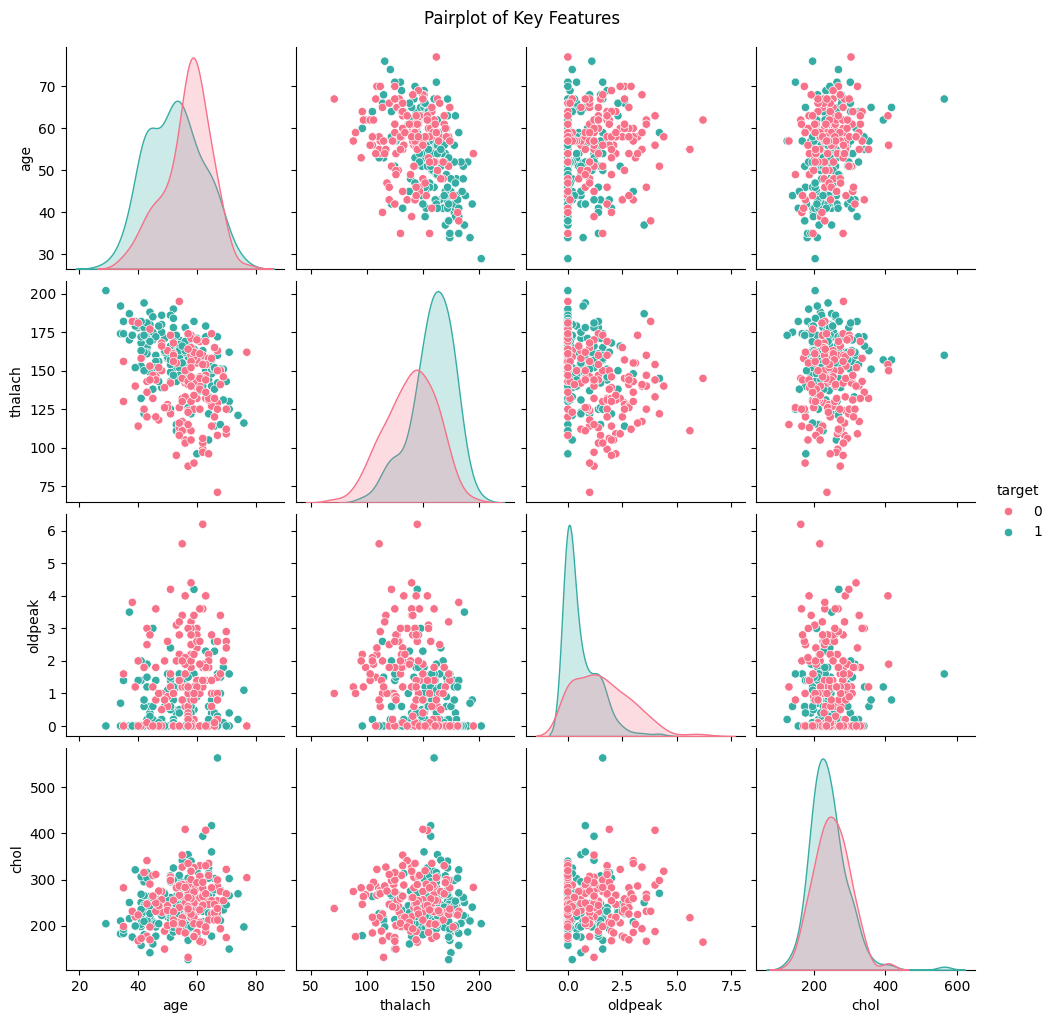

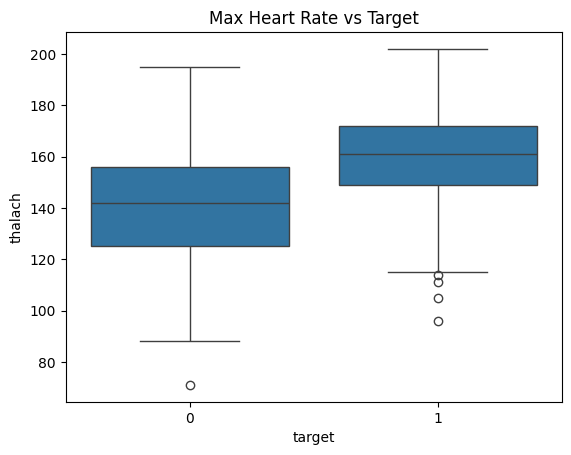

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

# Distribution of Target
sns.countplot(data=df, x='target', palette='Set2')
plt.title("Heart Disease Distribution")
plt.show()

# Chest Pain vs Target
sns.countplot(data=df, x='cp', hue='target', palette='Set1')
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

# Pairplot
sns.pairplot(df[['age', 'thalach', 'oldpeak', 'chol', 'target']], hue='target', palette='husl')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# Boxplot
sns.boxplot(x='target', y='thalach', data=df)
plt.title("Max Heart Rate vs Target")
plt.show()


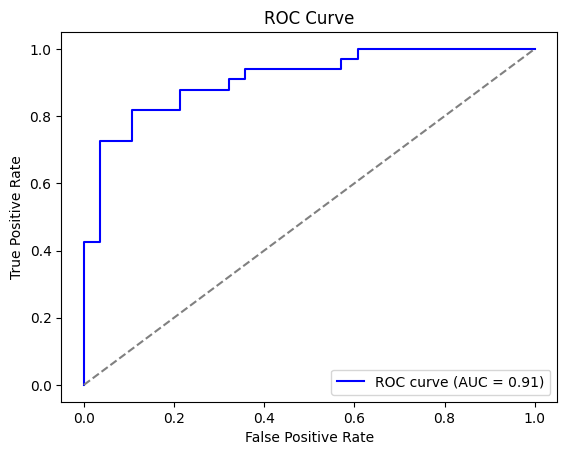

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


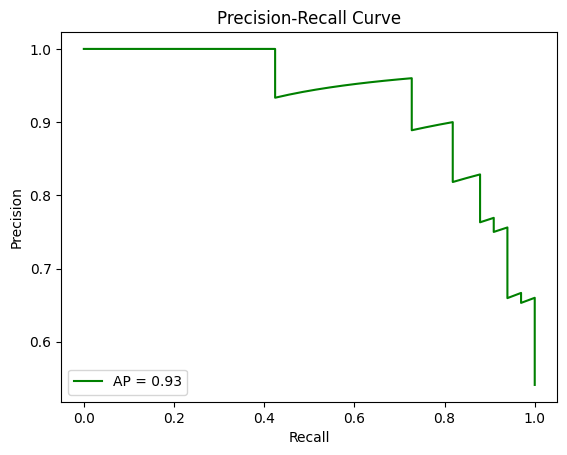

In [20]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

plt.figure()
plt.plot(recall, precision, color='green', label=f'AP = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


### *ML Model -- Using Random Forest*

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X = df.drop("target", axis=1)
y = df["target"]
categorical = ["cp", "restecg", "slope", "thal"]
numerical = list(set(X.columns) - set(categorical))

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61

Confusion Matrix: 
 [[19  9]
 [ 4 29]]
ROC AUC Score: 0.8961038961038962


`Testing data using Random Forest Classifier`

In [41]:
import pandas as pd
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
           'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
new_patient_df = pd.DataFrame([[54, 1, 2, 130, 250, 0, 1, 150, 0, 1.0, 2, 0, 2]],columns=columns)
predicted_class = pipeline.predict(new_patient_df)[0]
predicted_prob = pipeline.predict_proba(new_patient_df)[0][1]

# Output
print(f"Prediction: {'Heart Disease' if predicted_class == 1 else 'No Heart Disease'}")
print(f"Confidence Score (percentage): {predicted_prob*100:.2f}")


Prediction: Heart Disease
Confidence Score (percentage): 86.00


`Testing data using Keras Model (Deep Learning)`

In [40]:
import pandas as pd
import numpy as np

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
           'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

new_patient_df = pd.DataFrame([[54, 1, 2, 130, 250, 0, 1, 150, 0, 1.0, 2, 0, 2]],
                              columns=columns)

processed_input = preprocessor.transform(new_patient_df)

keras_prob = model.predict(processed_input)[0][0]
keras_class = int(keras_prob > 0.5)

# Output
print(f"Prediction (Keras): {'Heart Disease' if keras_class == 1 else 'No Heart Disease'}")
print(f"Confidence Score (Percentage): {keras_prob*100:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction (Keras): Heart Disease
Confidence Score (Percentage): 90.40
